In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Configuro pandas para que me de el formato en digitos enteros en vez de elevado
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
dftrain = pd.read_csv("../NBA_csv/modelo22_23.csv")

In [3]:
df_numericas = dftrain.select_dtypes(include='number')
df_numericas

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salario
0,34,78,78,2373,477,899,0.53,136,364,0.37,341,535,0.64,0.61,149,190,0.78,157,363,520,99,37,193,107,203,1239,13906976
1,32,67,65,2183,490,1023,0.48,158,411,0.38,332,612,0.54,0.56,152,177,0.86,79,262,341,495,79,25,197,116,1290,33665040
2,28,63,63,2024,707,1278,0.55,47,171,0.28,660,1107,0.60,0.57,498,772,0.65,137,605,742,359,52,51,246,197,1959,42492492
3,27,72,70,1972,245,557,0.44,146,366,0.40,99,191,0.52,0.57,114,126,0.91,61,176,237,163,62,14,72,117,750,8500000
4,27,70,22,1818,398,803,0.50,95,257,0.37,303,546,0.56,0.56,96,125,0.77,154,518,672,105,29,16,81,115,987,10843350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,24,42,2,474,67,155,0.43,18,60,0.30,49,95,0.52,0.49,20,41,0.49,21,86,107,38,18,7,31,53,172,1930681
414,26,30,0,469,65,122,0.53,18,40,0.45,47,82,0.57,0.61,26,39,0.67,22,73,95,67,16,6,33,48,174,1245164
415,33,31,1,358,45,117,0.39,21,75,0.28,24,42,0.57,0.47,10,13,0.77,27,80,107,53,4,14,32,57,121,105522
416,20,4,0,93,9,26,0.35,3,12,0.25,6,14,0.43,0.40,7,9,0.78,2,11,13,18,1,2,11,8,28,4144320


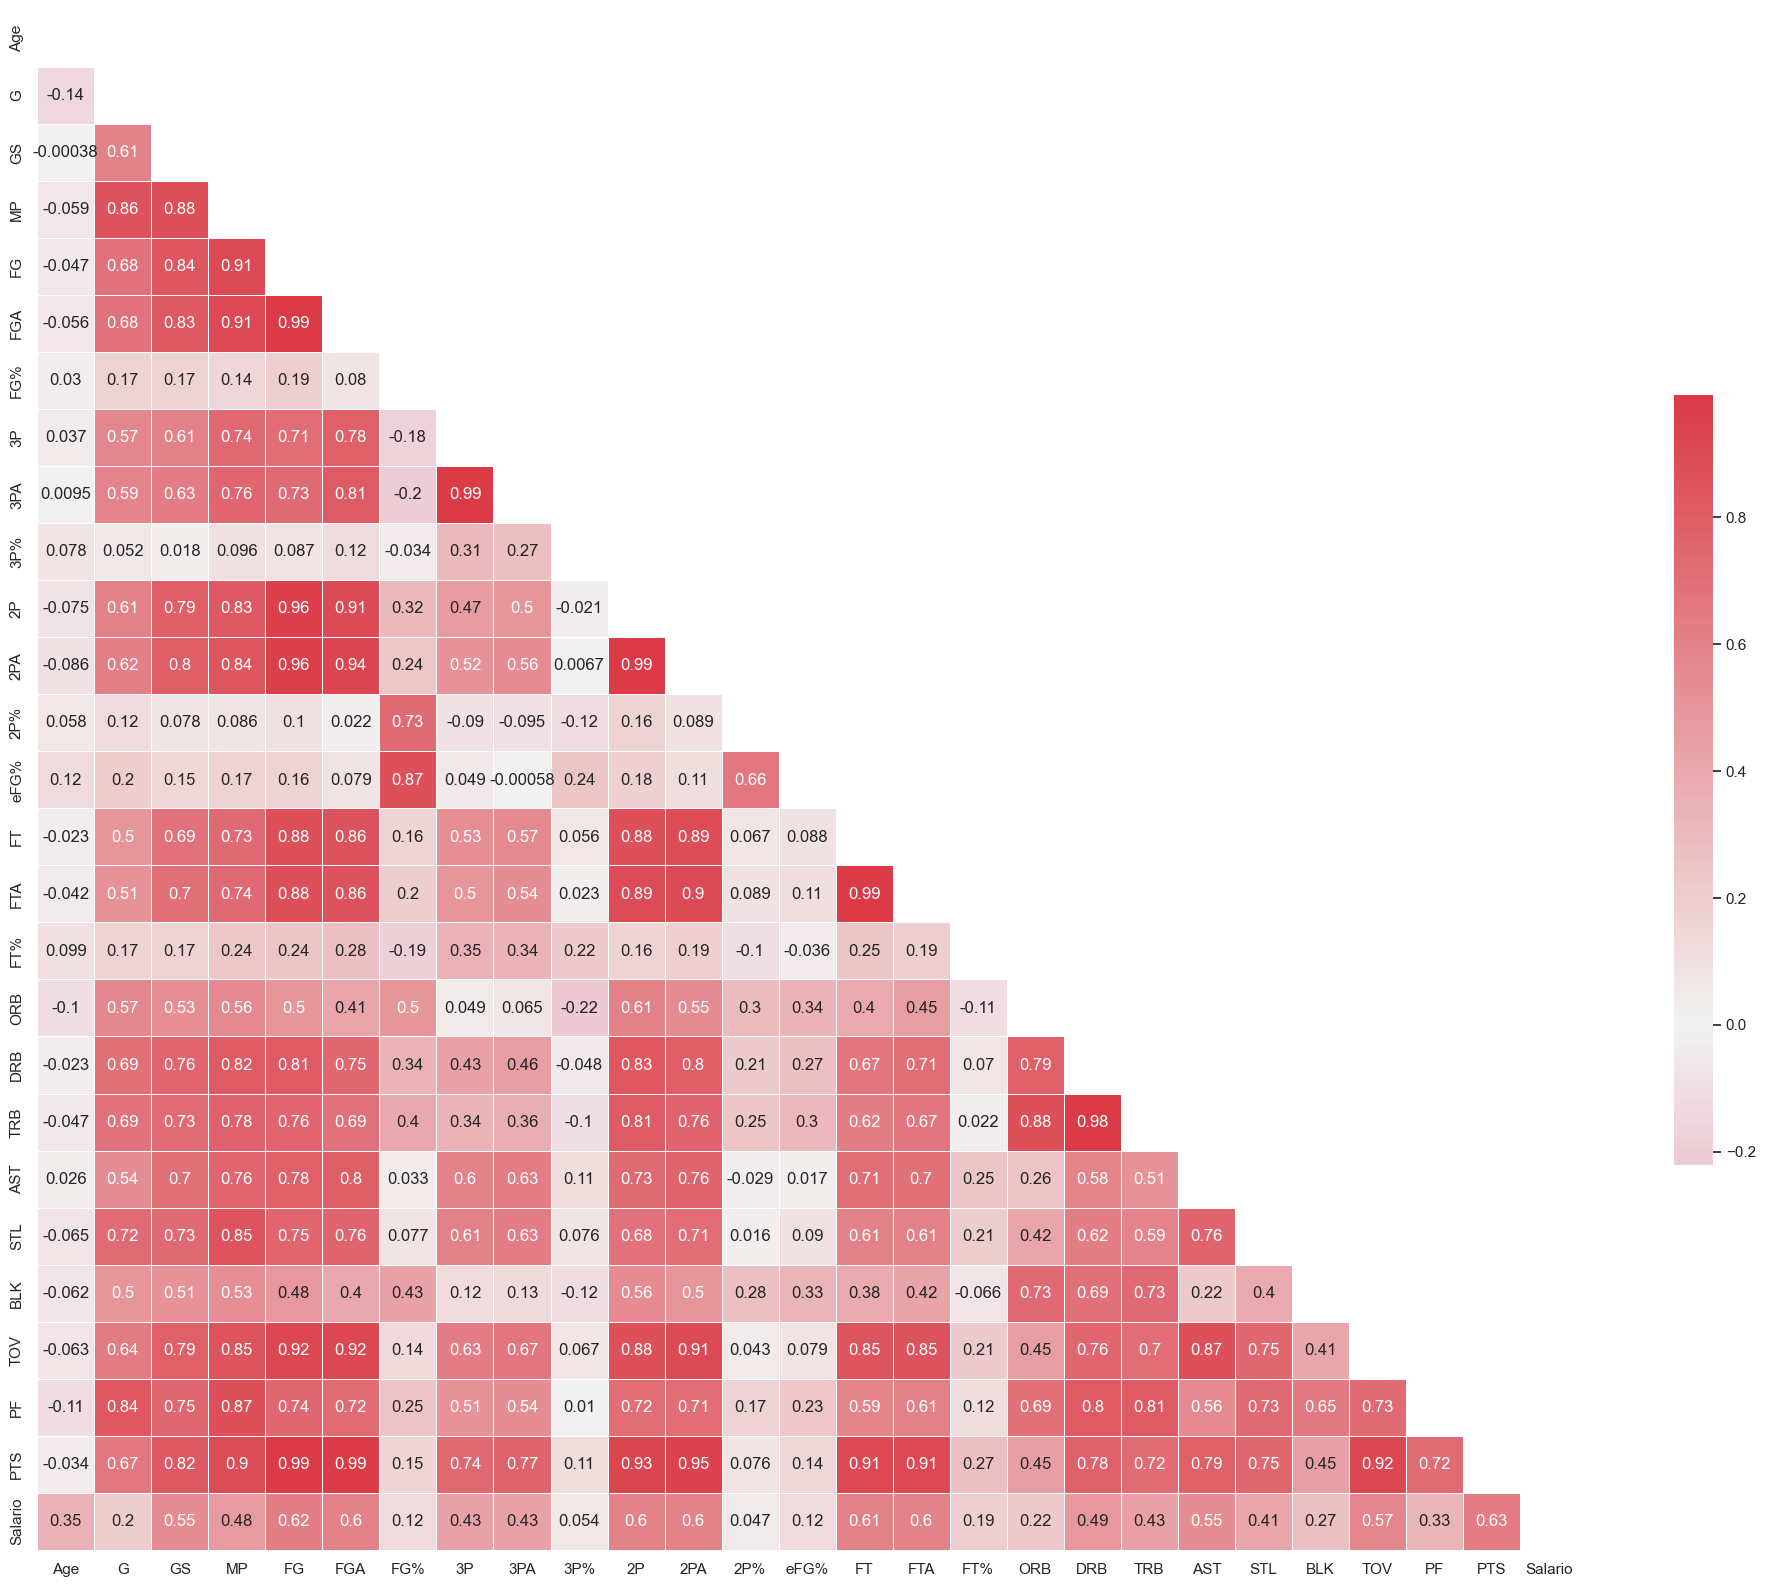

In [4]:
plt.figure(figsize=(25, 20))

sns.set(style='white')

mask=np.triu(np.ones_like(df_numericas.corr("spearman"), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(df_numericas.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [5]:
df_numericas= df_numericas.drop(columns = ["G", "FG%", "3P%", "2P%", "FT%", "ORB", "DRB", "PF"])

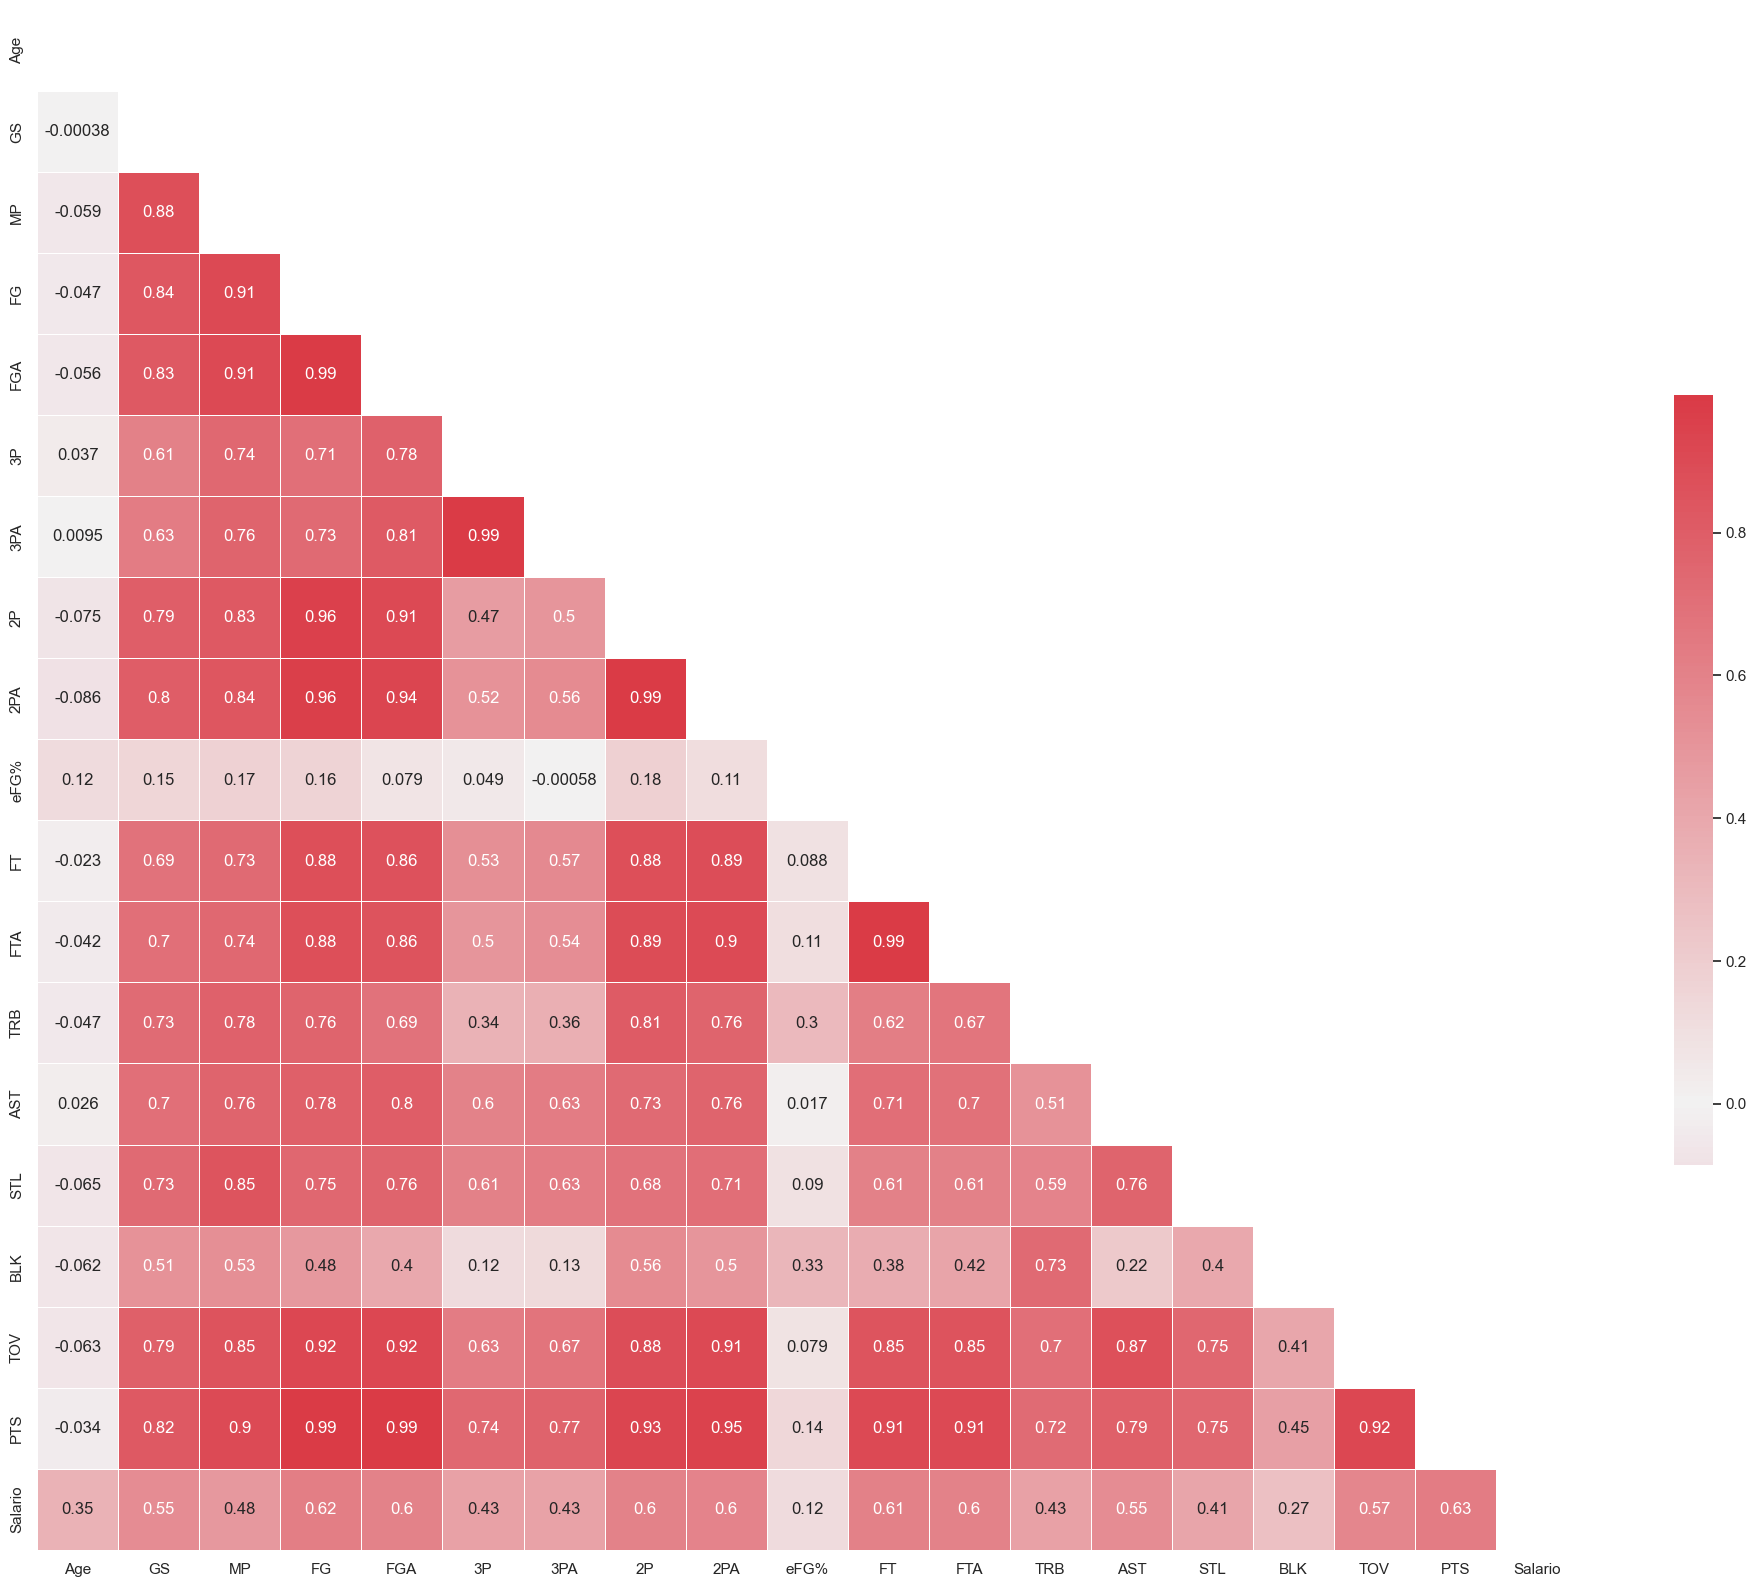

In [6]:
plt.figure(figsize=(25, 20))

sns.set(style='white')

mask=np.triu(np.ones_like(df_numericas.corr("spearman"), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(df_numericas.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [7]:
df_numericas = df_numericas.drop(columns = ["FG","FGA","2P","2PA","FT","FTA","TOV","eFG%","BLK",])

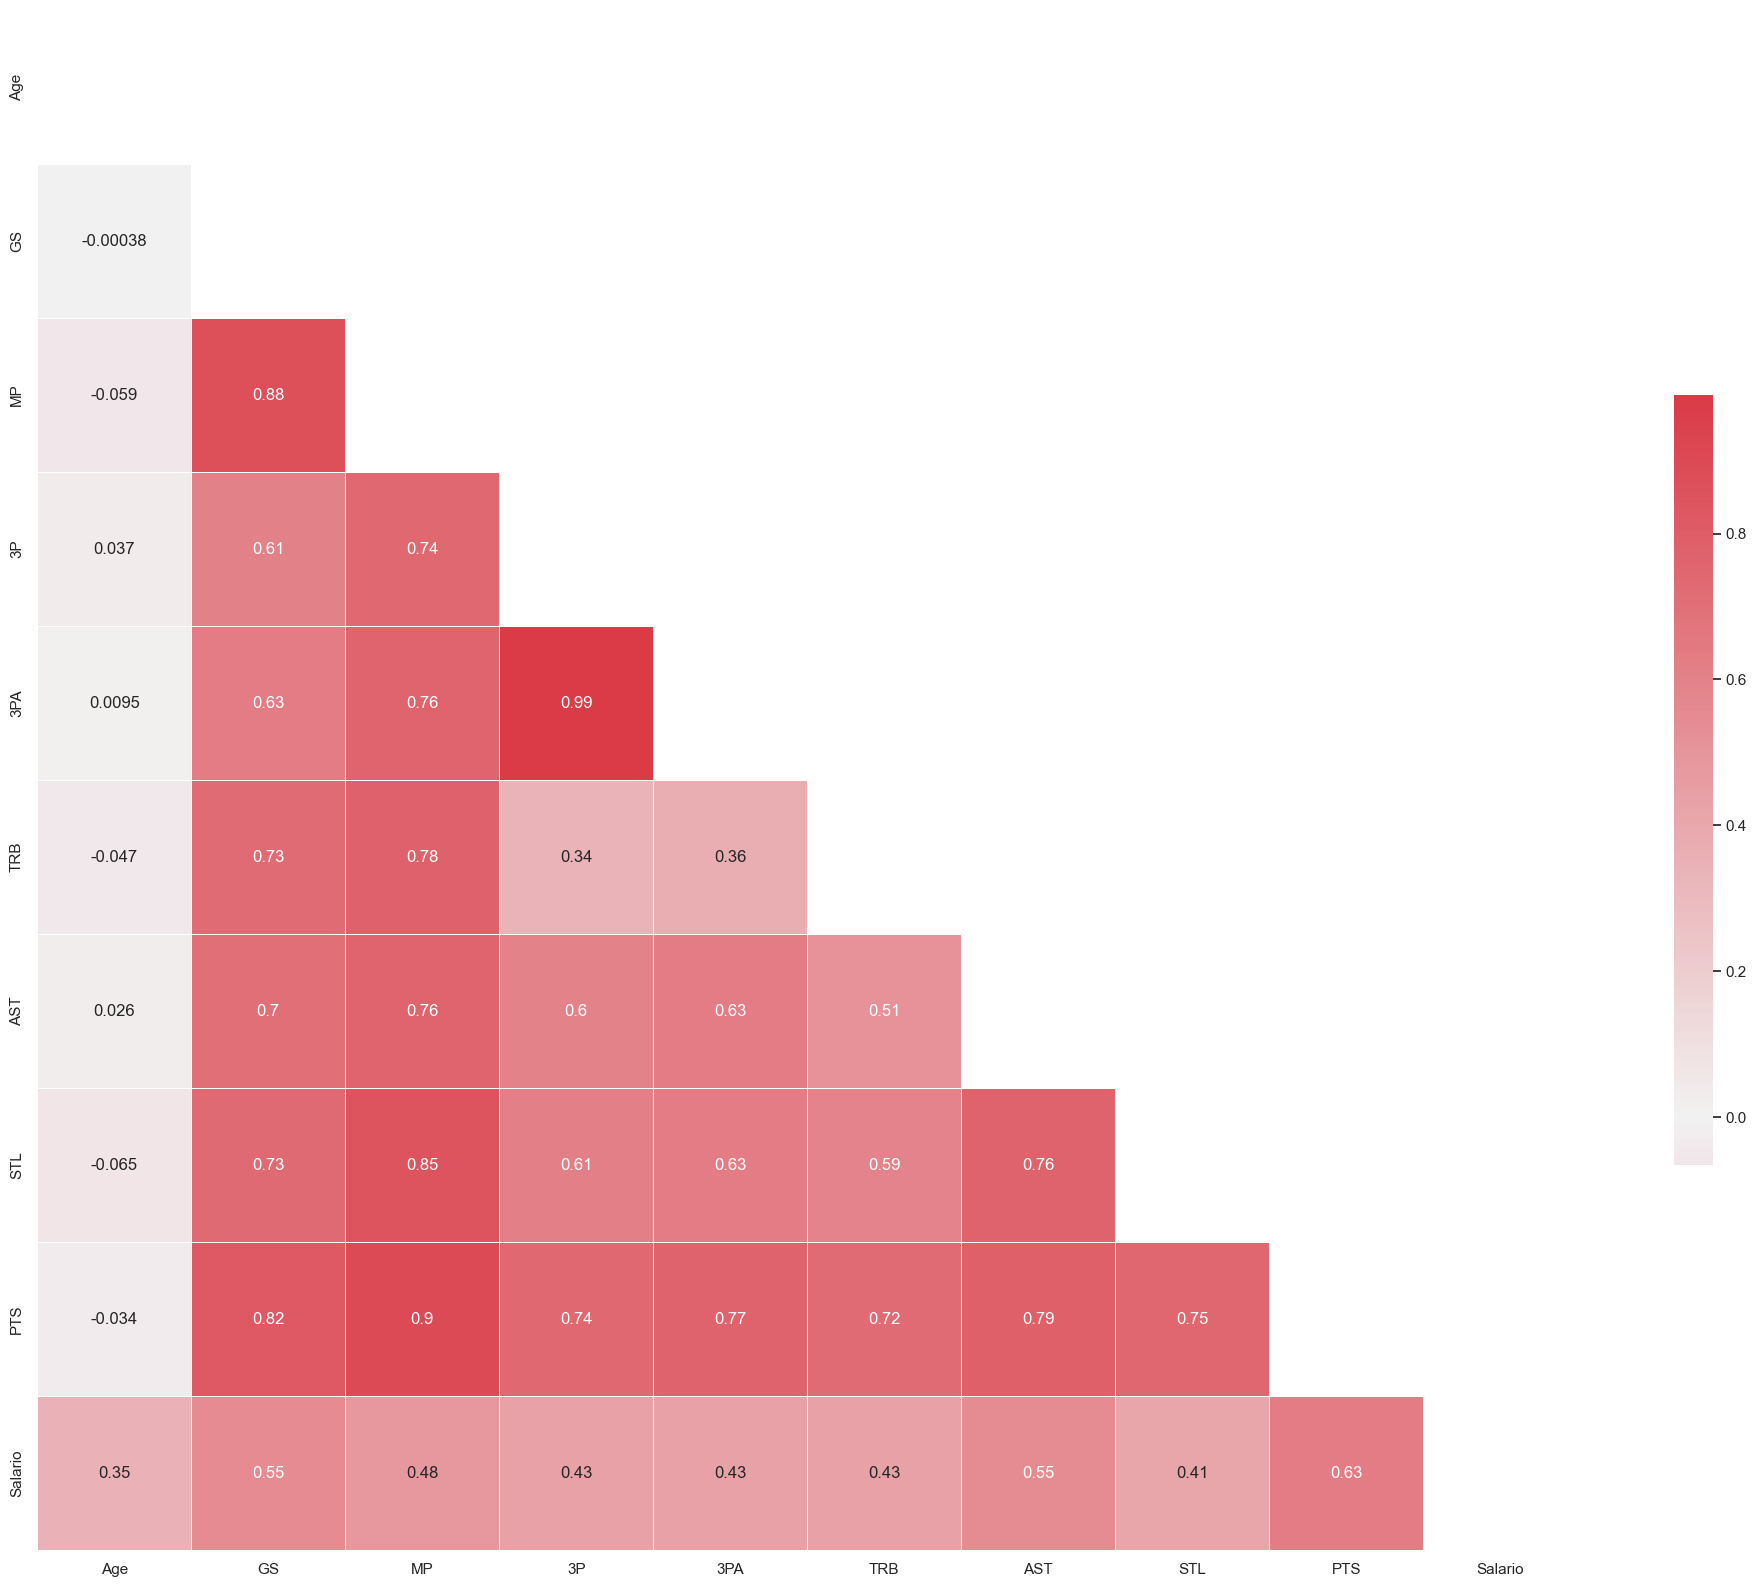

In [8]:
plt.figure(figsize=(25, 20))

sns.set(style='white')

mask=np.triu(np.ones_like(df_numericas.corr("spearman"), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(df_numericas.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [9]:
X = df_numericas.drop("Salario", axis = 1)

y = df_numericas.Salario

In [10]:
from sklearn.model_selection import train_test_split as tts   # el alias es cosa


X_train, X_test, y_train, y_test = tts(X, y,
                                       train_size=0.8,
                                       test_size=0.2,
                                       random_state=42,
                                      )

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((334, 9), (84, 9), (334,), (84,))

In [11]:
from lazypredict.Supervised import LazyRegressor

# Split the data into training and testing sets (if not already split)

# Initialize Lazy Regressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
# Fit and score all models
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:03<00:00, 12.48it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 735
[LightGBM] [Info] Number of data points in the train set: 334, number of used features: 9
[LightGBM] [Info] Start training from score 9667239.206587
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [12]:
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import mean_squared_error
et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)

model_rfr= rfr(random_state=42, n_estimators = 100)

et_model.fit(X_train, y_train)

ExtraTreesRegressor(random_state=42)

In [13]:
model_rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
y_pred = model_rfr.predict(X_test)
y_pred2 = et_model.predict(X_test)

In [18]:
mse = mean_squared_error(y_test, y_pred2, squared = False)

mse

7487715.056187482

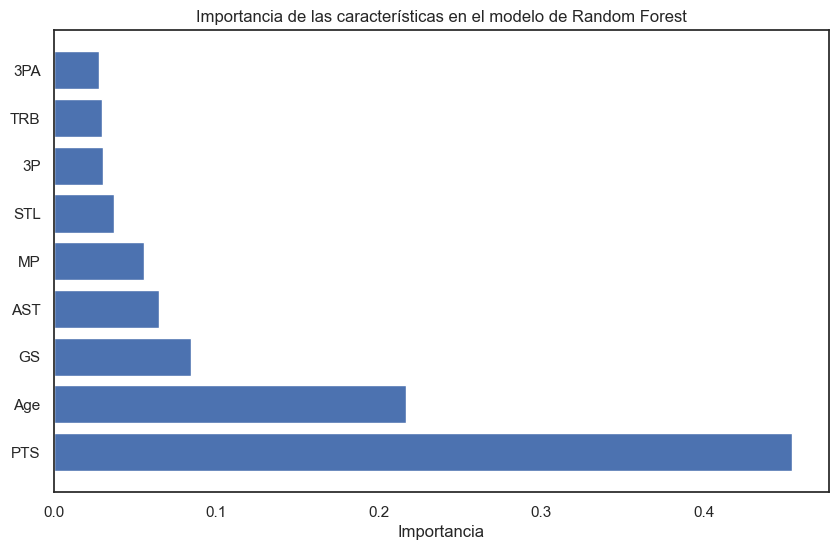

In [16]:
feature_importances = model_rfr.feature_importances_

# Crear un DataFrame para visualizar las importancias de las características
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizar las importancias de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importancia')
plt.title('Importancia de las características en el modelo de Random Forest')
plt.show()

In [17]:
# Obtener la importancia de las características
feature_importances = model_rfr.feature_importances_

# Crear un diccionario de importancias de características
feature_importance_dict = dict(zip(X_train.columns, feature_importances*100))

# Imprimir el diccionario de importancias
print("Importancia de características:")
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance}")

Importancia de características:
Age: 21.659280064623843
GS: 8.436760373764557
MP: 5.5606653452314685
3P: 3.0066714288377496
3PA: 2.7708096434301983
TRB: 2.940657488530826
AST: 6.50350303131946
STL: 3.6889925131248362
PTS: 45.43266011113706
